# Author:-Harshal Kakade
    
## Task-2:-Prediction Using Unsupervised Learning
    
## Problem Statement:-From the given ‘Iris’ dataset, predict the optimum number of cluster and represent it visually.

# The Spark Foundation
## Graduation Rotational Internship Program(GRIP) July-2021 Batch
### Data Science and Business Analytics

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [3]:
# reading the dataset
df=pd.read_csv(r'C:\Users\Harshal\Desktop\Iris.csv')

In [4]:
# head():-display first five rows of dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# checking shape of dataset
df.shape

(150, 6)

In [6]:
# checking for missing/null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing/null values in dataset

In [8]:
# checking some information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
x=df.iloc[:,1:5]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\Harshal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


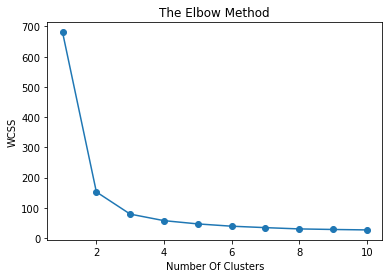

In [10]:
# to finding optimal number of clusters we use elbow method
from sklearn.cluster import KMeans

#elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=5)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# plotting result in line plot    
plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')

plt.show()

From the above graph, we can see that after 3rd cluster the value of within cluster sum of squares (wcss) are decrease very slowly/gradually that means the movement of data points are very less
Therefore we choose the number of clusters as k=3.

In [11]:
# fitting the k-means over dataset
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=5)

y_kmeans=kmeans.fit_predict(x)

In [15]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


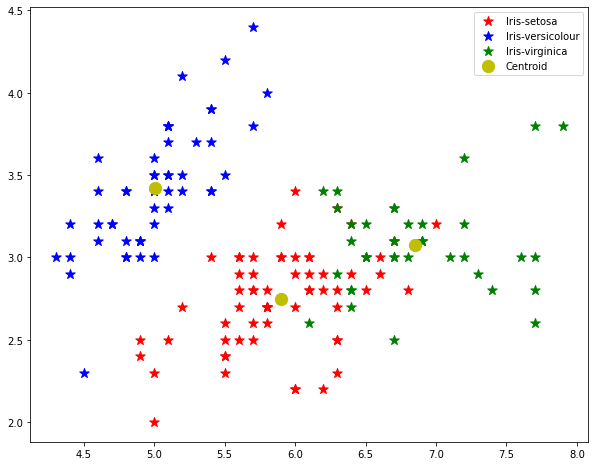

In [16]:
# visulising the clusters
x=np.array(x)
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s=100,c='r',label='Iris-setosa',marker='*')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s=100,c='b',label='Iris-versicolour',marker='*')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s=100,c='g',label='Iris-virginica',marker='*')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='y',label='Centroid')
plt.legend()

plt.show()